In [44]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import sys
sys.path.append('./module')
from utils import log_diff, log_diff_inv, load_fx_data

%matplotlib inline
def log_diff(arr):
    return np.array([arr[0], *np.diff(arr)])

# 時系列データ読み込み

In [2]:
instrument_list = ['USD_JPY', 'GBP_JPY', 'EUR_JPY']

df_dict = load_fx_data(instrument_list)
# df_dict['USD_JPY']

df_dict_stable = {}
for instrument in df_dict.keys():
    df_stable = df_dict[instrument].copy()
    for column in df_stable.columns:
        df_stable[column] = log_diff(df_stable[column].values)
    df_dict_stable[instrument] = df_stable
df_dict_stable['EUR_JPY']

,Open_ask,High_ask,Low_ask,Close_ask,Volume,Open_bid,High_bid,Low_bid,Close_bid
Time,,,,,,,,,
2014-01-01 22:00:00+00:00,4.976223,4.977857,4.961858,4.965401,11.870698,4.975188,4.977478,4.961711,4.964438
2014-01-02 22:00:00+00:00,-0.010676,-0.012310,-0.006207,-0.005869,-0.227903,-0.010687,-0.012496,-0.006229,-0.005714
2014-01-05 22:00:00+00:00,-0.006100,-0.004151,-0.003266,-0.003141,0.094074,-0.005411,-0.003712,-0.003246,-0.002848
2014-01-06 22:00:00+00:00,-0.003057,-0.001353,0.003097,0.002594,-0.081550,-0.003220,-0.001339,0.003098,0.002602
2014-01-07 22:00:00+00:00,0.002594,0.004087,0.001260,-0.000309,0.108926,0.002630,0.004039,0.001260,-0.000429
...,...,...,...,...,...,...,...,...,...
2018-12-03 22:00:00+00:00,-0.000341,-0.000728,-0.007206,-0.008522,0.346793,-0.000341,-0.000961,-0.007222,-0.008409
2018-12-04 22:00:00+00:00,-0.008155,-0.004372,0.001323,0.003807,-0.512500,-0.007693,-0.004163,0.001323,0.003808
2018-12-05 22:00:00+00:00,0.003463,-0.000265,-0.000924,-0.001753,0.845674,0.003464,-0.000506,-0.000932,-0.001754


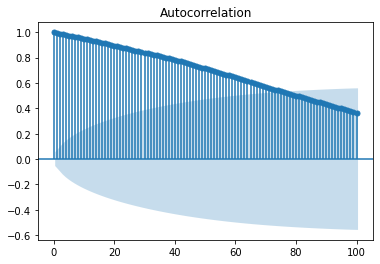

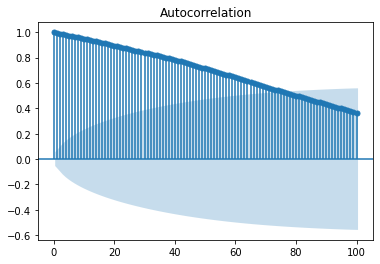

In [3]:
from statsmodels.tsa import arima_model
# ARIMA
from statsmodels.graphics import tsaplots
usd = df_dict['USD_JPY']['Close_ask']
usd_diff = df_dict_stable['USD_JPY']['Close_ask']
tsaplots.plot_acf(usd, lags=100)

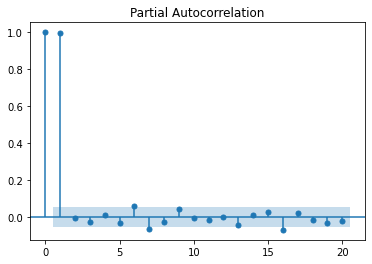

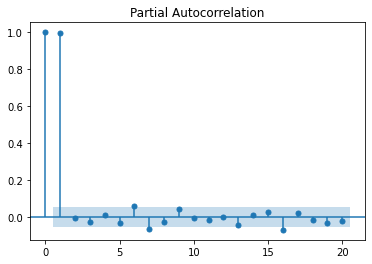

In [4]:
tsaplots.plot_pacf(usd, lags=20)

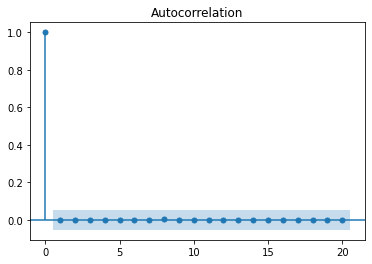

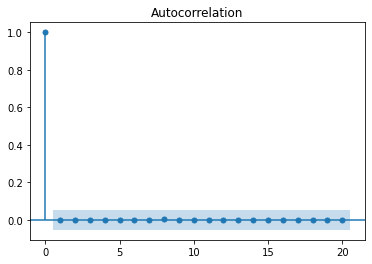

In [36]:
tsaplots.plot_acf(usd_diff, lags=20)

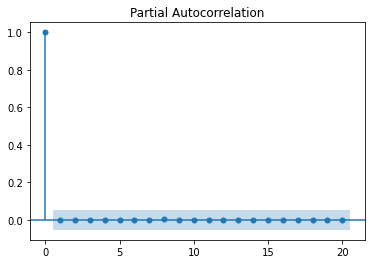

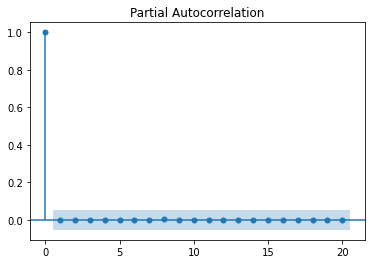

In [6]:
tsaplots.plot_pacf(usd_diff, lags=20)

In [18]:
from statsmodels.tsa import stattools as st
train = usd_diff.values[1:501]
test = usd_diff.values[501:521]

st.arma_order_select_ic(train, ic='aic')

{'aic':              0            1            2
 0 -3866.068304 -3864.207520 -3862.459358
 1 -3864.200965 -3862.269046 -3860.605226
 2 -3862.486842 -3860.604992 -3869.944182
 3 -3860.532209 -3858.605433 -3861.573259
 4 -3859.035369 -3858.982194 -3868.562290,
 'aic_min_order': (2, 2)}

In [43]:
p = 2
d = 0
q = 2
model = arima_model.ARIMA(train, order=(p, d, q)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(2, 2)   Log Likelihood                1940.972
Method:                       css-mle   S.D. of innovations              0.005
Date:                Fri, 18 Dec 2020   AIC                          -3869.944
Time:                        09:38:46   BIC                          -3844.657
Sample:                             0   HQIC                         -3860.021
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.376      0.169      -0.000       0.001
ar.L1.y       -1.1557      0.092    -12.596      0.000      -1.336      -0.976
ar.L2.y       -0.8486      0.073    -11.611      0.000      -0.992      -0.705
ma.L1.y        1.2338      0.071     17.484      0.000       1.095       1.372
ma.L2.y        0.9216      0.061     15.095      0.000       0.802       1.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6810           -0.8454j            1.0856           -0.3579
AR.2           -0.6810           +0.8454j            1.0856            0.3579
MA.1           -0.6694           -0.7981j            1.0417           -0.3611
MA.2           -0.6694           +0.7981j            1.0417            0.3611
-----------------------------------------------------------------------------
"""

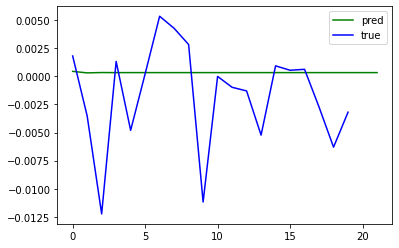

In [41]:
start = 501
end = 521
predict_diff = model.predict(start=start, end=end)
predict = predict_diff
# predict = np.cumsum([test[0], *-predict_diff[d:]])
# df = pd.concat([pd.DataFrame(predict), pd.DataFrame(test)], axis=1)
# df.plot()
plt.plot(predict, label='pred', color='g')
plt.plot(test, label='true', color='b')
# plt.plot(predict - usd_diff.values[start:end+1])
plt.legend()

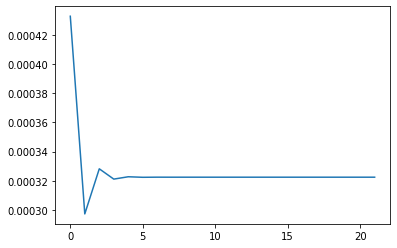

In [42]:
plt.plot(predict_diff)